In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
from sklearn.feature_extraction.text import TfidfTransformer # its for BOW
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(use_idf = True, norm = 'l2', smooth_idf=True)
stopwords = nltk.corpus.stopwords.words('english')
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LogisticRegressionCV

[nltk_data] Downloading package vader_lexicon to C:\Users\Danjin
[nltk_data]     master\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Convert CSV TO UTF-8 Encoding using google docs or microsoft tools
Data = pd.read_csv('Datasetwithutf.csv')
Data.head(10)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL friend.............
1,2,0,I missed the New Moon trailer...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at...
4,5,0,i think mi bf is cheating on me!!! T_T
5,6,0,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| TV...
8,9,1,handed in my uniform today . i miss you already
9,10,1,hmmmm.... i wonder how she my number @-)


In [3]:
Data.shape

(99989, 3)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [5]:
Data.describe()

,ItemID,Sentiment
count,99989.000000,99989.000000
mean,50005.110042,0.564632
std,28865.894393,0.495808
min,1.000000,0.000000
25%,25009.000000,0.000000
50%,50006.000000,1.000000
75%,75003.000000,1.000000
max,100000.000000,1.000000


In [6]:
Data.columns

Index(['ItemID', 'Sentiment', 'SentimentText'], dtype='object')

In [7]:
Data["Sentiment"].value_counts(normalize=True)
#56% are yes and 43% are 0

1    0.564632
0    0.435368
Name: Sentiment, dtype: float64

<AxesSubplot:>

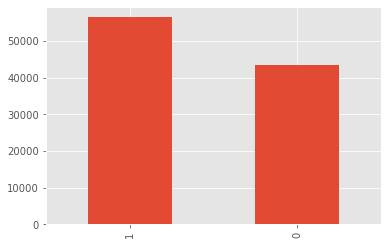

In [8]:
plt.style.use('ggplot')
Data['Sentiment'].value_counts().plot(kind='bar')

In [9]:
Data.dropna(inplace = True)

In [14]:
# Empty = []
# for i,lb,rv in Data.itertuples():
#     if type(rv)==str:
#         if rv.isspace():
#             empty.append(i)
# df.drop(empty, inplace=True)

In [22]:
#Let's check the polarity of 1st value.
print(Data.loc[0]['SentimentText'])
sid.polarity_scores(Data.loc[0]['SentimentText'])

is so sad for my APL friend.............


{'neg': 0.361, 'neu': 0.639, 'pos': 0.0, 'compound': -0.5256}

In [24]:
print(Data.loc[2]['SentimentText'])
sid.polarity_scores(Data.loc[2]['SentimentText'])

omg its already 7:30 :O


{'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'compound': -0.2808}

In [27]:
Data['scores'] = Data['SentimentText'].apply(lambda review: sid.polarity_scores(review))
Data.head()

,ItemID,Sentiment,SentimentText,scores
0,1,0,is so sad for my APL friend.............,"{'neg': 0.361, 'neu': 0.639, 'pos': 0.0, 'comp..."
1,2,0,I missed the New Moon trailer...,"{'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'comp..."
2,3,1,omg its already 7:30 :O,"{'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'comp..."
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at...,"{'neg': 0.129, 'neu': 0.871, 'pos': 0.0, 'comp..."
4,5,0,i think mi bf is cheating on me!!! T_T,"{'neg': 0.39, 'neu': 0.61, 'pos': 0.0, 'compou..."


In [37]:
Data['compound'] = Data['scores'].apply(lambda score_dict: score_dict['compound'])
Data.head()

,ItemID,Sentiment,SentimentText,scores,compound
0,1,0,is so sad for my APL friend.............,"{'neg': 0.361, 'neu': 0.639, 'pos': 0.0, 'comp...",-0.5256
1,2,0,I missed the New Moon trailer...,"{'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'comp...",-0.2960
2,3,1,omg its already 7:30 :O,"{'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'comp...",-0.2808
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at...,"{'neg': 0.129, 'neu': 0.871, 'pos': 0.0, 'comp...",-0.4767
4,5,0,i think mi bf is cheating on me!!! T_T,"{'neg': 0.39, 'neu': 0.61, 'pos': 0.0, 'compou...",-0.6679


In [39]:
Data['comp_score'] = Data['compound'].apply(lambda c: 'pos' if c>=0 else 'neg')
Data.head()

,ItemID,Sentiment,SentimentText,scores,compound,comp_score
0,1,0,is so sad for my APL friend.............,"{'neg': 0.361, 'neu': 0.639, 'pos': 0.0, 'comp...",-0.5256,neg
1,2,0,I missed the New Moon trailer...,"{'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'comp...",-0.2960,neg
2,3,1,omg its already 7:30 :O,"{'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'comp...",-0.2808,neg
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at...,"{'neg': 0.129, 'neu': 0.871, 'pos': 0.0, 'comp...",-0.4767,neg
4,5,0,i think mi bf is cheating on me!!! T_T,"{'neg': 0.39, 'neu': 0.61, 'pos': 0.0, 'compou...",-0.6679,neg


<AxesSubplot:>

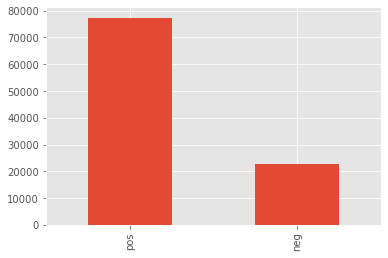

In [40]:
#according to NLTK library or without preprocvessing.
plt.style.use('ggplot')
Data['comp_score'].value_counts().plot(kind='bar')

In [47]:
#we can check the accuracy classification report and confuction matrix between real data and nltk

In [49]:
Df = pd.read_csv('Datasetwithutf.csv')
Df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL friend.............
1,2,0,I missed the New Moon trailer...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at...
4,5,0,i think mi bf is cheating on me!!! T_T


In [52]:
#we Don't need to encoding because you have already it.

In [67]:
y = Df['Sentiment'].values
X = tfidf.fit_transform(Df['SentimentText'].values.astype('U'))

In [68]:
y

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, shuffle= False)

In [80]:
clf = LogisticRegressionCV(cv=5, scoring='accuracy', random_state=0, n_jobs=-1, verbose=3, max_iter=100).fit(X_train, y_train)
saved_model = open('saved_model.sav','wb')
pickle.dump(clf, saved_model)
saved_model.close

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   52.5s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   56.3s finished


<function BufferedWriter.close>

In [87]:
clf.score(X_test, y_test)   

0.762996299629963